<a href="https://colab.research.google.com/github/Mithix67/AIES-Practical/blob/main/Exp-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:-Mithul CE                                                            
Class:- B.Tech
DIV: A                                                                  
PRN NO. 22SC114501026                                                                
Title:- Transparency in AI decision making

Columns:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy       

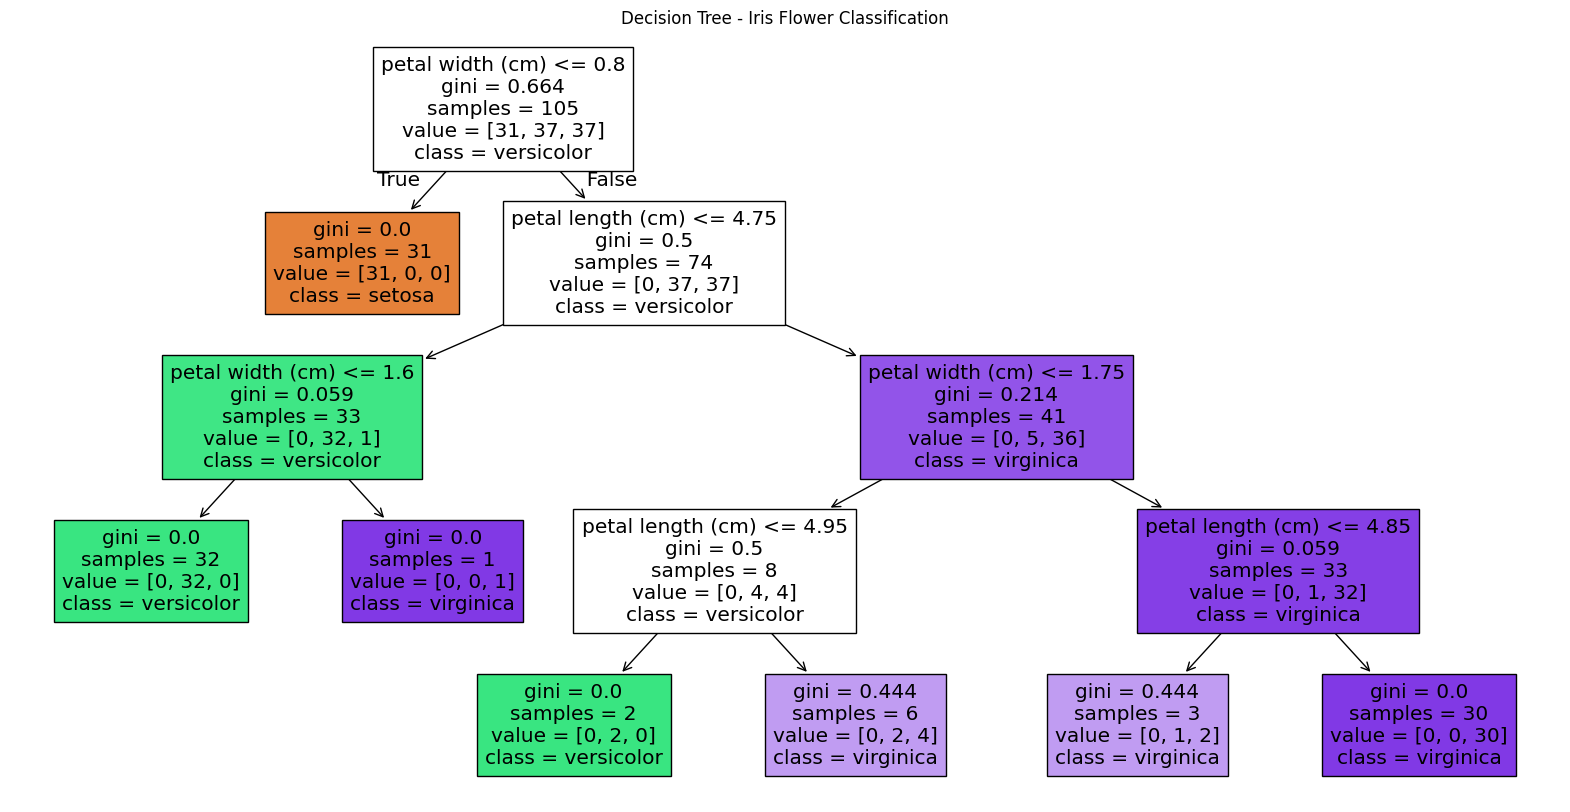

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = setosa, 1 = versicolor, 2 = virginica

# Step 2: Check columns and missing values
print("Columns:\n", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Step 3: Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Step 6: Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Step 7: Evaluation
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest, target_names=data.target_names))

# Step 8: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Decision Tree - Iris Flower Classification")
plt.show()
